# Trabaho 1 - Machine Learning 1
#### Autores: 
Roberto Coutinho  
Thais Galho

Atividade:  

Agrupe os dados do censo americano de 2005 com o K-means e algum algoritmo hierarquico  
Não considerar a classe do conjunto de dados  
Somente um conjunto de dados  
Dados devem ser pré-processados  
Usar vários números de grupos (ex: 2 a 20)  
Medir a qualidade dos grupos com a silhueta (podem usar outros também)  
Qual é o melhor número de grupos? Qual é o melhor algoritmo? Motivos?  
Entregar via BB o código python ou jupyter e o passo a passo realizado (ex, motivos do pre-processamento etc.) em um zip.

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.metrics import confusion_matrix



Read the dataset and show

In [63]:
columns= ["age", 
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "class"]

censo = pd.read_csv('censo/adult.data', 
                    nrows=None, 
                    header=None,
                    index_col=None)

censo.columns = columns

print str(len(censo)) + ' total records' 
    
censo.head(5)

32561 total records


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


32561

Remove the class labels

In [66]:
#Nao considerar a classe do conjunto de dados - coluna 14 representa a classe dos dados deste dataset
#censo.drop(columns=["gain"] ,inplace=True)
#censo.head(3)

Filter the only the columns to test

In [68]:
columns_to_filter = ['age', 'hours-per-week']

df = censo.loc[:, columns_to_filter]

df = df.sample(frac=0.3) 

print str(len(df)) + ' records'

df.head()

9768 records


,age,hours-per-week
31204,44,40
3290,33,40
13911,50,60
16570,18,20
23427,30,40


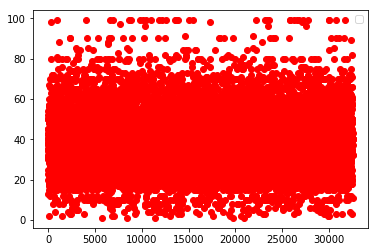

In [69]:
plt.figure()
plt.plot(df, 'ro'); 
plt.legend()

### Pré-processamento (Normalização e Discretização)

### Execução 

In [59]:
scores = pd.DataFrame(columns=["n_clusters", 
                               "silhuete metric",
                               "calinski metric", 
                               "method",])

num_of_max_clusters = 5  # Number of clusters

print "Number of max clusters to validate : "+str(num_of_max_clusters)
print
print '##########################################################'
print

for i in range(num_of_max_clusters):
    
    i = i + 2 #Does not make sense do one cluster! Start with two.
    
    print 'Starting processing with '+str(i)+' clusters...'
    
    ##########################################################
    # Run kmeans
    ##########################################################    
    
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init=10, 
                    max_iter=300)
    
    kmeans_clust = kmeans.fit(df)
    
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_    
    
    #Calculate the scores
    score_silhuete = silhouette_score(df,labels)
    score_ca = calinski_harabaz_score(df,labels)   
    
    #Add to score dataframe
    scores.loc[len(scores)] = [i, score_silhuete, score_ca, 'kmeans']
    
    ##########################################################
    # Run linkage
    ##########################################################
    
    link = linkage(df, 'single')
    
    clusters = fcluster(link, 
                        i, 
                        criterion='maxclust')
    
    #Calculate the scores
    score_silhuete_link = silhouette_score(df,clusters)
    score_ca_link = calinski_harabaz_score(df,clusters)    
    
    #Add to score dataframe
    scores.loc[len(scores)] = [i, score_silhuete_link, score_ca_link, 'linkage']
    
    #Calculate the confusion matrix : Predictions X ground truth
    #conf_matrix = confusion_matrix(df.astype(int)['class'], labels)
    
    
   
    # Print results
    print 'Results :'
    print
    print 'Metrics:'
    print scores.sort_values(['silhuete metric', 'calinski metric'], ascending=[False, False])
    print
    print 'Centroids:'
    print centroids
    print
    print 'Labels:'
    print labels
    print 
    #print 'Confusion Matrix: Predicted X Ground Truth'
    print #conf_matrix
    print
    print '--------------------------------'
    print 
    
    
    
    #print link
    #print '--------------------------------'




Number of max clusters to validate : 5

##########################################################

Starting processing with 2 clusters
Results :

Metrics:
  n_clusters  silhuete metric  calinski metric   method
1          2         0.632145        11.828390  linkage
0          2         0.391289      5875.369968   kmeans

Centroids:
[[51.59694129 42.06364085]
 [28.92387119 39.14018201]]

Labels:
[0 0 1 ... 0 0 0]



--------------------------------

Starting processing with 3 clusters
Results :

Metrics:
  n_clusters  silhuete metric  calinski metric   method
1          2         0.632145        11.828390  linkage
3          3         0.539696        33.507558  linkage
2          3         0.397864      5962.616410   kmeans
0          2         0.391289      5875.369968   kmeans

Centroids:
[[38.55223069 56.9570185 ]
 [28.63939456 35.939865  ]
 [53.78756988 37.41400855]]

Labels:
[2 2 1 ... 2 2 0]



--------------------------------

Starting processing with 4 clusters
Results :

Metr

In [39]:
print scores.sort_values(['silhuete metric', 'calinski metric'], ascending=[False, False]).head(10)

  n_clusters  silhuete metric  calinski metric   method
1          2         0.616220        10.531000  linkage
3          3         0.500491         8.428047  linkage
5          4         0.496483         8.268974  linkage
7          5         0.483591         9.517800  linkage
9          6         0.482730        81.523494  linkage
6          5         0.437572      7136.421756   kmeans
4          4         0.424677      6469.119652   kmeans
8          6         0.410045      7648.626393   kmeans
2          3         0.408907      6109.278677   kmeans
0          2         0.390011      5879.336595   kmeans


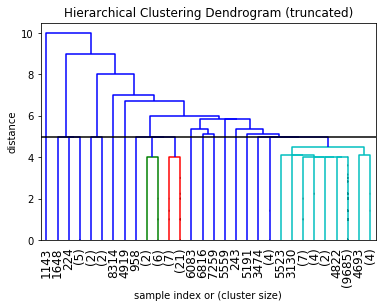

In [70]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

max_d = 5  # max_d as in max_distance

fancy_dendrogram(
    link,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [ ]:
print df.astype(int)['class']